<a href="https://colab.research.google.com/github/izzyasi/Churn-Analise-exploratoria/blob/main/Isabelly_Aprendizado_de_M%C3%A1quina_Churn_An%C3%A1lise_explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
########################################################################################################################

# Bank Churn Data Exploration And Churn Prediction = cancelamentos de cliente
##### Objetivo: fazer uma análise exploratória do dados

In [2]:
########################################################################################################################

# Significado das colunas
##### CLIENTNUM: Client number. Unique identifier for the customer holding the account
##### Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
##### Customer_Age: Demographic variable - Customer's Age in Years
##### Gender: Demographic variable - M=Male, F=Female
##### Dependent_count: Demographic variable - Number of dependents
##### Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
##### Marital_Status: Demographic variable - Married, Single, Divorced, Unknown
##### Income_Category: Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)
##### Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
##### Months_on_book: Period of relationship with bank
##### Total_Relationship_Count: Total no. of products held by the customer
##### Months_Inactive_12_mon: No. of months inactive in the last 12 months
##### Contacts_Count_12_mon: No. of Contacts in the last 12 months
##### Credit_Limit: Credit Limit on the Credit Card:
##### Total_Revolving_Bal: Total Revolving Balance on the Credit Card
##### Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
##### Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
##### Total_Trans_Amt: Total Transaction Amount (Last 12 months)
##### Total_Trans_Ct: Total Transaction Count (Last 12 months)
##### Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
##### Avg_Utilization_Ratio: Average Card Utilization Ratio




# Importanto pacotes

In [3]:
# Carrega a biblioteca pandas e atribui um alias chamado "pd"
import pandas as pd

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Deixar colunas e linhas aparentes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Conectando com o drive

In [4]:
# Conexão com o drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Leitura da tabela de dados

In [5]:
# Faz a leitura do arquivo BankChurners.xlsx
df = pd.read_excel('/content/drive/MyDrive/BankChurners.xlsx')
df.shape

(10127, 21)

# Exercício treinamento

In [6]:
#1. Escolha uma variável categórica e tire a frequência simples e relativa
     # a. Analise o resultado das frequências

# Frequência simples
df['Card_Category'].value_counts(dropna=False)

,count
Card_Category,
Blue,9436
Silver,555
Gold,116
Platinum,20


In [7]:
#Frequência relativa (%)

df['Card_Category'].value_counts(normalize=True) * 100

,proportion
Card_Category,
Blue,93.176656
Silver,5.480399
Gold,1.145453
Platinum,0.197492


In [8]:
#2. Crie um novo dataframe com 3 colunas numéricas e 2 categóricas
#a. Das variáveis numéricas calcule: média, mediana, moda e desvio padrão
#b. Das variáveis categóricas encontre as categorias mais e menos frequentes
#c. Analise o resultado dos itens a e b

df_num_cat = df[['Dependent_count','Credit_Limit','Total_Relationship_Count','Card_Category','Education_Level']]
df_num_cat.head(5)

,Dependent_count,Credit_Limit,Total_Relationship_Count,Card_Category,Education_Level
0,3,12691.0,5,Blue,High School
1,5,8256.0,6,Blue,Graduate
2,3,3418.0,4,Blue,Graduate
3,4,3313.0,3,Blue,High School
4,3,4716.0,5,Blue,Uneducated


In [9]:
#a. Das variáveis numéricas calcule: média, mediana, moda e desvio padrão

df_num_cat = df[['Dependent_count','Credit_Limit','Total_Relationship_Count']].mean()

df_num_cat.head(5)

,0
Dependent_count,2.346203
Credit_Limit,8631.953698
Total_Relationship_Count,3.812580


In [10]:
df_num_cat = df[['Dependent_count','Credit_Limit','Total_Relationship_Count']].median()

df_num_cat.head(5)

,0
Dependent_count,2.0
Credit_Limit,4549.0
Total_Relationship_Count,4.0


In [11]:
df_num_cat = df[['Dependent_count','Credit_Limit','Total_Relationship_Count']].mode()

df_num_cat.head(5)

,Dependent_count,Credit_Limit,Total_Relationship_Count
0,3,34516.0,3


In [12]:
df_num_cat = df[['Dependent_count','Credit_Limit','Total_Relationship_Count']].std()

df_num_cat.head(5)

,0
Dependent_count,1.298908
Credit_Limit,9088.776650
Total_Relationship_Count,1.554408


In [13]:
#b. Das variáveis categóricas encontre as categorias mais e menos frequentes

df_num_cat = df[['Card_Category','Education_Level']].mode()

df_num_cat.head(5)

,Card_Category,Education_Level
0,Blue,Graduate


In [14]:
df_num_cat = df[['Card_Category','Education_Level']].value_counts()

df_num_cat.tail(20100)

Card_Category  Education_Level
Blue           Graduate           2899
               High School        1888
               Unknown            1420
               Uneducated         1391
               College             940
               Post-Graduate       476
               Doctorate           422
Silver         Graduate            185
               High School          98
               Uneducated           82
               Unknown              78
               College              58
Gold           Graduate             36
Silver         Post-Graduate        32
Gold           High School          26
Silver         Doctorate            22
Gold           Unknown              18
               College              15
               Uneducated           11
Platinum       Graduate              8
Gold           Doctorate             5
               Post-Graduate         5
Platinum       Uneducated            3
               Post-Graduate         3
               Unknown               3
               Doctorate             2
               High School           1
Name: count, dtype: int64

In [15]:
#3. Crie um novo dataframe apenas com o ID do cliente e o limite de crédito

df_id_credit = df[['CLIENTNUM','Credit_Limit']]
df_id_credit.head(5)

,CLIENTNUM,Credit_Limit
0,768805383,12691.0
1,818770008,8256.0
2,713982108,3418.0
3,769911858,3313.0
4,709106358,4716.0


# Checagem da tabela de dados

In [16]:
# Mostra o número linhas, número de colunas
print('Shape do df original:', df.shape)

Shape do df original: (10127, 21)


In [17]:
# Mostra o total de linhas do df
len(df)

10127

In [18]:
# Primeiras cinco linhas do dataset
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1335.0,1144,42,1625.0,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1541.0,1291,33,3714.0,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2594.0,1887,20,2333.0,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1405.0,1171,20,2333.0,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2175.0,816,28,2.5,0.000


In [19]:
# ultimas cinco linhas do dataset
df.tail(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [20]:
# Cinco amostras aleatórias do dataset
df.sample(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8078,770774133,Existing Customer,53,M,3,Graduate,Single,$80K - $120K,Silver,39,1,2,3,34516.0,1198,33318.0,0.615,4826,70,0.667,0.035
9560,708103608,Existing Customer,52,M,1,High School,Single,$60K - $80K,Blue,45,1,5,1,11898.0,2517,9381.0,0.745,15798,128,0.730,0.212
546,772264383,Existing Customer,44,M,2,Graduate,Single,$120K +,Blue,33,4,1,3,13301.0,0,13301.0,1058.000,1385,50,0.515,0.000
9527,719420058,Existing Customer,44,M,4,Unknown,Single,$80K - $120K,Blue,26,1,2,1,11782.0,2177,9605.0,0.875,16605,110,0.692,0.185
10001,714945708,Attrited Customer,33,M,4,College,Single,$40K - $60K,Silver,20,2,1,3,15977.0,0,15977.0,0.702,7745,64,0.684,0.000


In [21]:
# Informações do dataset como data type, quantidades, dados faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [22]:
# Frequencia da coluna Income_Category
# Aqui mostra todas as possibilidades que existem na coluna com o número
#   de vezes que aparece
# df['Income_Category'].value_counts(dropna=False)

# OU

# A opção normalize=True mostra a distribuição %
df.Income_Category.value_counts(dropna=False, normalize=True)

,proportion
Income_Category,
Less than $40K,0.351634
$40K - $60K,0.176755
$80K - $120K,0.151575
$60K - $80K,0.138442
Unknown,0.109805
$120K +,0.071788


In [23]:
# Apenas mostra as colunas do seu dataframe em ordem alfabética
# Não está alterando o seu dataframe
sorted(df.columns)

['Attrition_Flag',
 'Avg_Open_To_Buy',
 'Avg_Utilization_Ratio',
 'CLIENTNUM',
 'Card_Category',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Customer_Age',
 'Dependent_count',
 'Education_Level',
 'Gender',
 'Income_Category',
 'Marital_Status',
 'Months_Inactive_12_mon',
 'Months_on_book',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Ct_Chng_Q4_Q1',
 'Total_Relationship_Count',
 'Total_Revolving_Bal',
 'Total_Trans_Amt',
 'Total_Trans_Ct']

In [24]:
# Criando um dataset menor para facilitar
df_menor = df[[
 'Attrition_Flag',
 'Avg_Open_To_Buy',
 'Avg_Utilization_Ratio',
 'CLIENTNUM',
 'Card_Category',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Customer_Age',
 'Dependent_count',
 'Education_Level',
 'Gender',
 'Income_Category',
 'Marital_Status',
 'Months_Inactive_12_mon',
 'Months_on_book'
]]
df_menor.shape

(10127, 15)

In [25]:
# Mostra o número de linhas do dataframe
len(df_menor)

10127

In [26]:
# Mostra as 4 primeiras linhas do dataframe
df_menor.head(4)

,Attrition_Flag,Avg_Open_To_Buy,Avg_Utilization_Ratio,CLIENTNUM,Card_Category,Contacts_Count_12_mon,Credit_Limit,Customer_Age,Dependent_count,Education_Level,Gender,Income_Category,Marital_Status,Months_Inactive_12_mon,Months_on_book
0,Existing Customer,11914.0,0.061,768805383,Blue,3,12691.0,45,3,High School,M,$60K - $80K,Married,1,39
1,Existing Customer,7392.0,0.105,818770008,Blue,2,8256.0,49,5,Graduate,F,Less than $40K,Single,1,44
2,Existing Customer,3418.0,0.000,713982108,Blue,0,3418.0,51,3,Graduate,M,$80K - $120K,Married,1,36
3,Existing Customer,796.0,0.760,769911858,Blue,1,3313.0,40,4,High School,F,Less than $40K,Unknown,4,34


# Comando df.describe()
##### Estatísticas descritivas das variáveis (colunas numéricas)
##### count = total de registros
##### mean = média
##### std = desvio padrão
##### min = mínimo
##### 25% = 1o quartil
##### 50% = 2o quartil = mediana
##### 75% = 3o quartil
##### max = máximo


###################################
###################################
###################################


##### Estatísticas das variáveis (colunas object)
# Comando df.describe(include='object')
##### count = total de registros
##### unique = contagem de categorias únicas
##### top = categoria mais frequente
##### freq = frequencia da categoria mais frequente

In [27]:
# Estatísticas do dataset
df_menor.describe()

,Avg_Open_To_Buy,Avg_Utilization_Ratio,CLIENTNUM,Contacts_Count_12_mon,Credit_Limit,Customer_Age,Dependent_count,Months_Inactive_12_mon,Months_on_book
count,10127.000000,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7469.139637,0.274894,7.391776e+08,2.455317,8631.953698,46.325960,2.346203,2.341167,35.928409
std,9090.685324,0.275691,3.690378e+07,1.106225,9088.776650,8.016814,1.298908,1.010622,7.986416
min,3.000000,0.000000,7.080821e+08,0.000000,1438.300000,26.000000,0.000000,0.000000,13.000000
25%,1324.500000,0.023000,7.130368e+08,2.000000,2555.000000,41.000000,1.000000,2.000000,31.000000
50%,3474.000000,0.176000,7.179264e+08,2.000000,4549.000000,46.000000,2.000000,2.000000,36.000000
75%,9859.000000,0.503000,7.731435e+08,3.000000,11067.500000,52.000000,3.000000,3.000000,40.000000
max,34516.000000,0.999000,8.283431e+08,6.000000,34516.000000,73.000000,5.000000,6.000000,56.000000


In [28]:
# Estatísticas de colunas categoricas, a inclusão de 'o' ou 'object'
# df_menor.describe(include='o')
df_menor.describe(include='object')

,Attrition_Flag,Card_Category,Education_Level,Gender,Income_Category,Marital_Status
count,10127,10127,10127,10127,10127,10127
unique,2,4,7,2,6,4
top,Existing Customer,Blue,Graduate,F,Less than $40K,Married
freq,8500,9436,3128,5358,3561,4687


In [29]:
df['Education_Level'].value_counts(dropna=False)

,count
Education_Level,
Graduate,3128
High School,2013
Unknown,1519
Uneducated,1487
College,1013
Post-Graduate,516
Doctorate,451


In [30]:
# Média da variável Credit_Limit
df_menor['Credit_Limit'].mean()

np.float64(8631.953698034955)

In [31]:
# Soma da variável Credit_Limit
df_menor['Credit_Limit'].sum()

np.float64(87415795.1)

In [32]:
# Cálculo da média pela fórmula
df_menor['Credit_Limit'].sum()/len(df_menor)

np.float64(8631.953698034955)

In [33]:
87415795.1/10127

8631.953698034955

In [34]:
# Desvio padrão da variável Credit_Limit
df_menor['Credit_Limit'].std()

9088.776650223113

In [35]:
# Contagem da variável Credit_Limit
df_menor['Credit_Limit'].count()

np.int64(10127)

In [36]:
# Moda da variável Credit_Limit
df_menor['Credit_Limit'].mode()

,Credit_Limit
0,34516.0


In [37]:
# Mediana da variável Credit_Limit
df_menor['Credit_Limit'].median()

4549.0

In [38]:
# Menor valor da variável Credit_Limit
df_menor['Credit_Limit'].min()

1438.3

In [39]:
# Maior valor da variável LotArea
df_menor['Credit_Limit'].max()

34516.0

In [42]:
# Média de todas as colunas numericas
df_menor.mean(numeric_only=True)

,0
Avg_Open_To_Buy,7.469140e+03
Avg_Utilization_Ratio,2.748936e-01
CLIENTNUM,7.391776e+08
Contacts_Count_12_mon,2.455317e+00
Credit_Limit,8.631954e+03
Customer_Age,4.632596e+01
Dependent_count,2.346203e+00
Months_Inactive_12_mon,2.341167e+00
Months_on_book,3.592841e+01


In [43]:
# Médiana de todas as colunas numericas
df_menor.median(numeric_only=True)

,0
Avg_Open_To_Buy,3.474000e+03
Avg_Utilization_Ratio,1.760000e-01
CLIENTNUM,7.179264e+08
Contacts_Count_12_mon,2.000000e+00
Credit_Limit,4.549000e+03
Customer_Age,4.600000e+01
Dependent_count,2.000000e+00
Months_Inactive_12_mon,2.000000e+00
Months_on_book,3.600000e+01


In [44]:
# Soma de todas as colunas numericas e categóricas
df_menor.sum()

,0
Attrition_Flag,Existing CustomerExisting CustomerExisting Cus...
Avg_Open_To_Buy,75639977.1
Avg_Utilization_Ratio,2783.847
CLIENTNUM,7485651619341
Card_Category,BlueBlueBlueBlueBlueBlueGoldSilverBlueBlueBlue...
Contacts_Count_12_mon,24865
Credit_Limit,87415795.1
Customer_Age,469143
Dependent_count,23760
Education_Level,High SchoolGraduateGraduateHigh SchoolUneducat...


# Outros comandos

In [45]:
# Lista (array) com as possibilidades de categorias da coluna
df_menor.Attrition_Flag.unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [46]:
# Lista (array) com as possibilidades de categorias da coluna
df_menor.Card_Category.unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [47]:
# Contabiliza as possibilidades únicas de categorias da coluna
df_menor.Card_Category.nunique()

4

In [48]:
# Checando o df
# Mostra o número de linhas e colunas do df
print(df_menor.shape)

# Mostra o número de ID únicos
print(df_menor.CLIENTNUM.nunique())

(10127, 15)
10127


In [49]:
# Frequencia da coluna Card_Category
df_menor.Card_Category.value_counts(dropna=False)

,count
Card_Category,
Blue,9436
Silver,555
Gold,116
Platinum,20


In [50]:
# Mostra nome das colunas
df_menor.columns

# sorted(df_menor.columns)

Index(['Attrition_Flag', 'Avg_Open_To_Buy', 'Avg_Utilization_Ratio',
       'CLIENTNUM', 'Card_Category', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Customer_Age', 'Dependent_count', 'Education_Level', 'Gender',
       'Income_Category', 'Marital_Status', 'Months_Inactive_12_mon',
       'Months_on_book'],
      dtype='object')

In [51]:
# Altera nome da coluna CLIENTNUM para ID
df_menor.rename({'CLIENTNUM': 'ID'}, axis=1, inplace=True)

<ipython-input-51-6527c9c4fe36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_menor.rename({'CLIENTNUM': 'ID'}, axis=1, inplace=True)


In [52]:
# O comando head() é uma das formas de verificar essa alteração
df_menor.head(2)

,Attrition_Flag,Avg_Open_To_Buy,Avg_Utilization_Ratio,ID,Card_Category,Contacts_Count_12_mon,Credit_Limit,Customer_Age,Dependent_count,Education_Level,Gender,Income_Category,Marital_Status,Months_Inactive_12_mon,Months_on_book
0,Existing Customer,11914.0,0.061,768805383,Blue,3,12691.0,45,3,High School,M,$60K - $80K,Married,1,39
1,Existing Customer,7392.0,0.105,818770008,Blue,2,8256.0,49,5,Graduate,F,Less than $40K,Single,1,44


In [53]:
# Filtrando dataset por Card_Category == Blue - apenas visualização no output
# df_menor[['Attrition_Flag', 'Avg_Open_To_Buy', 'Avg_Utilization_Ratio','Card_Category']].loc[df_menor['Card_Category'] == 'Blue']

# Criando um novo df com a categoria Card_Category == Blue
df_blue = df_menor[['Attrition_Flag', 'Avg_Open_To_Buy', 'Avg_Utilization_Ratio','Card_Category']].loc[df_menor['Card_Category'] == 'Blue']
print(df_blue.shape)
df_blue.head(4)

(9436, 4)


,Attrition_Flag,Avg_Open_To_Buy,Avg_Utilization_Ratio,Card_Category
0,Existing Customer,11914.0,0.061,Blue
1,Existing Customer,7392.0,0.105,Blue
2,Existing Customer,3418.0,0.000,Blue
3,Existing Customer,796.0,0.760,Blue


In [54]:
# Filtrando dataset por Card_Category == Blue e Avg_Utilization_Ratio > 0.7
# df_menor[['Attrition_Flag',
            # 'Avg_Open_To_Buy',
            # 'Avg_Utilization_Ratio',
            # 'Card_Category']].loc[(df_menor['Card_Category']== 'Blue') & (df_menor['Avg_Utilization_Ratio'] > 0.7)]

df_blue_avg = df_menor[['Attrition_Flag',
                        'Avg_Open_To_Buy',
                        'Avg_Utilization_Ratio',
                        'Card_Category']].loc[(df_menor['Card_Category']== 'Blue') & (df_menor['Avg_Utilization_Ratio'] > 0.7)]
df_blue_avg.shape

(1059, 4)

# Map

In [55]:
# Frequencia da coluna Card_Category
df_menor['Card_Category'].value_counts(dropna=False)

,count
Card_Category,
Blue,9436
Silver,555
Gold,116
Platinum,20


In [56]:
# Criando a coluna Card_Category para Card_Category_num - transformando as categorias "string" em número de 0 a 3
df_menor['Card_Category_num'] = df_menor['Card_Category'].map({'Blue':0,
                                            'Silver':1,
                                            'Gold':2,
                                            'Platinum': 3})

<ipython-input-56-c4bbd0615a13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_menor['Card_Category_num'] = df_menor['Card_Category'].map({'Blue':0,


In [57]:
# Frequencia da nova coluna Card_Category_num
df_menor['Card_Category_num'].value_counts(dropna=False)

,count
Card_Category_num,
0,9436
1,555
2,116
3,20


In [58]:
# Frequencia da nova coluna Card_Category_num
df_menor['Card_Category_num'].value_counts(dropna=False, normalize=True)

,proportion
Card_Category_num,
0,0.931767
1,0.054804
2,0.011455
3,0.001975


# Dados faltantes (missing values)

In [59]:
# Checando dados ausentes
df_menor.isna().sum()
# df_menor.isnull().sum()

,0
Attrition_Flag,0
Avg_Open_To_Buy,0
Avg_Utilization_Ratio,0
ID,0
Card_Category,0
Contacts_Count_12_mon,0
Credit_Limit,0
Customer_Age,0
Dependent_count,0
Education_Level,0


In [65]:
# Preenchendo dados ausentes de ALGUMA VARIÁVEL
df_menor['Credit_Limit'].fillna('0', inplace=True)

<ipython-input-65-470be34bd159>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_menor['Credit_Limit'].fillna('0', inplace=True)
<ipython-input-65-470be34bd159>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_menor['Credit_Limit'].fillna('0', inplace=True)


In [66]:
# Checando novamente
df_menor.isna().sum()

,0
Attrition_Flag,0
Avg_Open_To_Buy,0
Avg_Utilization_Ratio,0
ID,0
Card_Category,0
Contacts_Count_12_mon,0
Credit_Limit,0
Customer_Age,0
Dependent_count,0
Education_Level,0


# Groupby

In [67]:
df_menor.Card_Category.value_counts(dropna=False)

,count
Card_Category,
Blue,9436
Silver,555
Gold,116
Platinum,20


In [68]:
# Agrupando dados pelo Card_Category e calculando a média de todas as colunas do df
Media = df_menor.groupby('Card_Category').mean(numeric_only=True)
print(Media.shape)
Media

(4, 10)


,Avg_Open_To_Buy,Avg_Utilization_Ratio,ID,Contacts_Count_12_mon,Credit_Limit,Customer_Age,Dependent_count,Months_Inactive_12_mon,Months_on_book,Card_Category_num
Card_Category,,,,,,,,,,
Blue,6205.967794,0.290859,7.391203e+08,2.455596,7363.780002,46.372404,2.336477,2.345697,35.960682,0.0
Gold,27072.051724,0.057103,7.381368e+08,2.448276,28416.370690,45.439655,2.672414,2.310345,35.525862,2.0
Platinum,29015.500000,0.043650,7.351706e+08,2.500000,30283.450000,47.500000,2.450000,2.250000,36.250000,3.0
Silver,24071.706306,0.057310,7.405147e+08,2.450450,25277.836036,45.679279,2.439640,2.273874,35.452252,1.0


# Crosstab (tabela com duas variáveis)

In [69]:
# Crosstab é como um pivot table fazendo uma contagem dos registros entre linhas e colunas.
pd.crosstab(df_menor['Card_Category'], df_menor['Attrition_Flag'])

Attrition_Flag,Attrited Customer,Existing Customer
Card_Category,,
Blue,1519,7917
Gold,21,95
Platinum,5,15
Silver,82,473


In [70]:
# Crosstab é como um pivot table fazendo uma contagem dos registros entre linhas e colunas.
# Neste caso estamos colocando Card_Category nas linhas e Attrition_Flag nas colunas.
pd.crosstab(df_menor['Card_Category'], df_menor['Attrition_Flag'], margins=True).style.background_gradient(cmap='OrRd')

Attrition_Flag,Attrited Customer,Existing Customer,All
Card_Category,,,
Blue,1519,7917,9436
Gold,21,95,116
Platinum,5,15,20
Silver,82,473,555
All,1627,8500,10127


# Visualização de dados

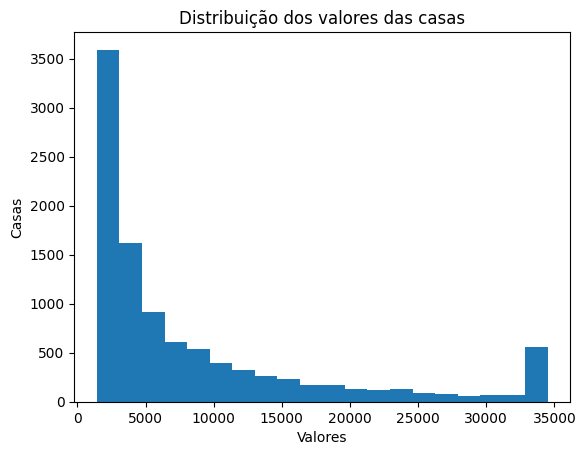

In [71]:
# Histograma da variável Credit_Limit, dropna() para não levar os dados ausentes e bins é a quantidade de barras.
plt.hist(df_menor['Credit_Limit'].dropna(), bins=20)
plt.title('Distribuição dos valores das casas')
plt.ylabel('Casas')
plt.xlabel('Valores')
plt.show()

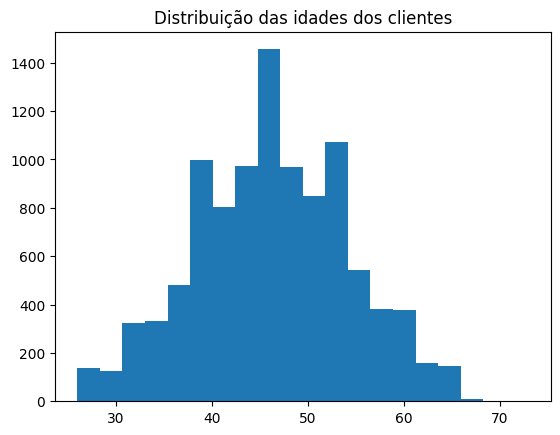

In [72]:
# Histograma da variável GarageType, dropna() para não levar os dados ausentes e bins é a quantidade de barras.
plt.hist(df_menor['Customer_Age'].dropna(), bins=20)
plt.title('Distribuição das idades dos clientes')
plt.show()

### Subplots

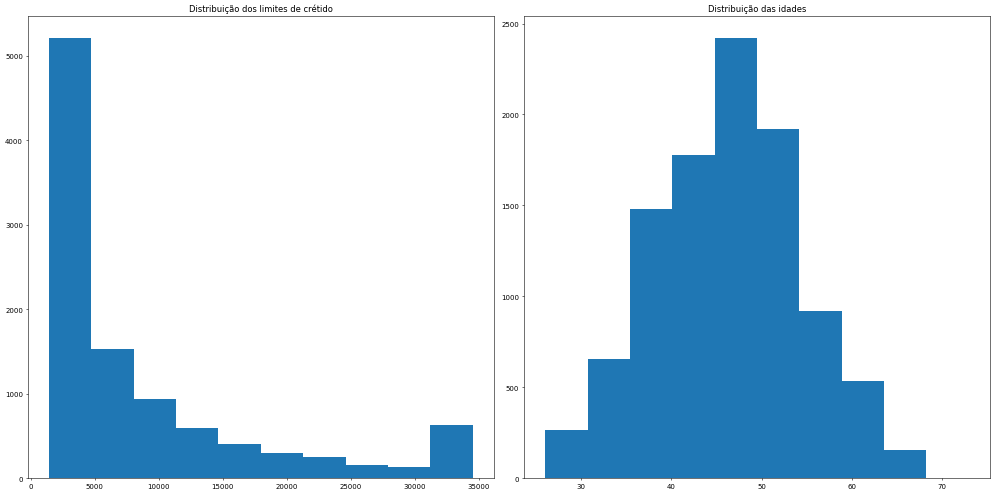

In [73]:
# 1º forma de criar subplots.

####################################### Atenção: esse comando plt.subplot(1,2,1) significa:
# 1,2,1: Este é um argumento para a função subplot() - define a disposição da grade dos subplots na figura. Neste caso:
# O primeiro número (1) especifica o número de linhas na grade de subplots.
# O segundo número (2) especifica o número de colunas na grade de subplots.
# O terceiro número (1) especifica a posição deste subplot específico na grade, contando de cima para baixo e da esquerda para a direita.

####################################### Atenção: esse comando plt.subplot(1,2,2) significa:
# 1,2,2: Este é um argumento para a função subplot() - define a disposição da grade dos subplots na figura. Neste caso:
# O primeiro número (1) especifica o número de linhas na grade de subplots.
# O segundo número (2) especifica o número de colunas na grade de subplots.
# O terceiro número (2) especifica a posição deste subplot específico na grade, contando de cima para baixo e da esquerda para a direita.

# Cria a figura para plot com altura e largura e qualidade(dpi)
plt.figure(figsize=(20,10), dpi=50)

# 1 linha, 2 coluna, 1º Grafico
plt.subplot(1,2,1)
# Histograma da variável Credit_Limit
plt.hist(df_menor['Credit_Limit'].dropna())
# Titulo do Grafico 1
plt.title('Distribuição dos limites de crétido')

# 1 linha, 2 coluna, 2º Grafico
plt.subplot(1,2,2)
# Histograma da variável Customer_Age
plt.hist(df_menor['Customer_Age'].dropna())
# Titulo do Grafico 2
plt.title('Distribuição das idades')

plt.tight_layout()
plt.show()

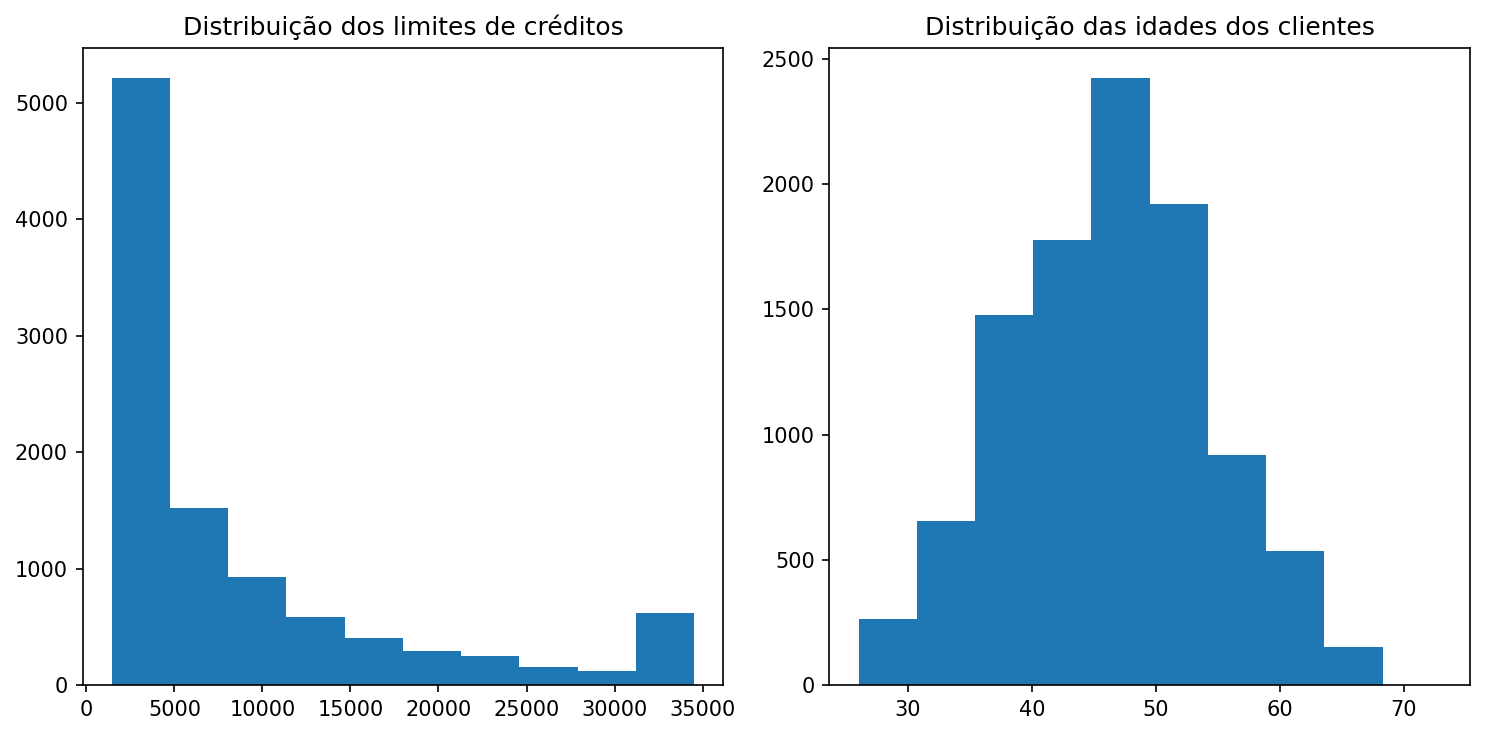

In [74]:
# 2º Forma de criar subplots

# Cria uma figura (f) e um array de dois eixos (ax) com uma linha e duas colunas, o que significa que estamos criando dois subplots lado a lado.
# O parâmetro figsize define o tamanho da figura como 10 polegadas de largura por 5 polegadas de altura, e dpi define a resolução da figura.
f, ax = plt.subplots(1,2, figsize=(10,5), dpi=150)

# Cria um histograma dos valores na coluna 'Credit_Limit' do DataFrame df_menor e o desenha no primeiro subplot (índice 0) criado anteriormente.
ax[0].hist(df_menor['Credit_Limit'].dropna())
# Define o título do primeiro subplot como 'Distribuição dos limites de créditos'.
ax[0].set_title('Distribuição dos limites de créditos')

# Cria um histograma dos valores na coluna 'Customer_Age' do DataFrame df_menor e o desenha no segundo subplot (índice 1) criado anteriormente.
ax[1].hist(df_menor['Customer_Age'].dropna())
# Define o título do segundo subplot como 'Distribuição das idades dos clientes'.
ax[1].set_title('Distribuição das idades dos clientes')

# Ajusta automaticamente a posição dos subplots para evitar sobreposição de elementos.
plt.tight_layout()
# Exibe a figura com os subplots.
plt.show()

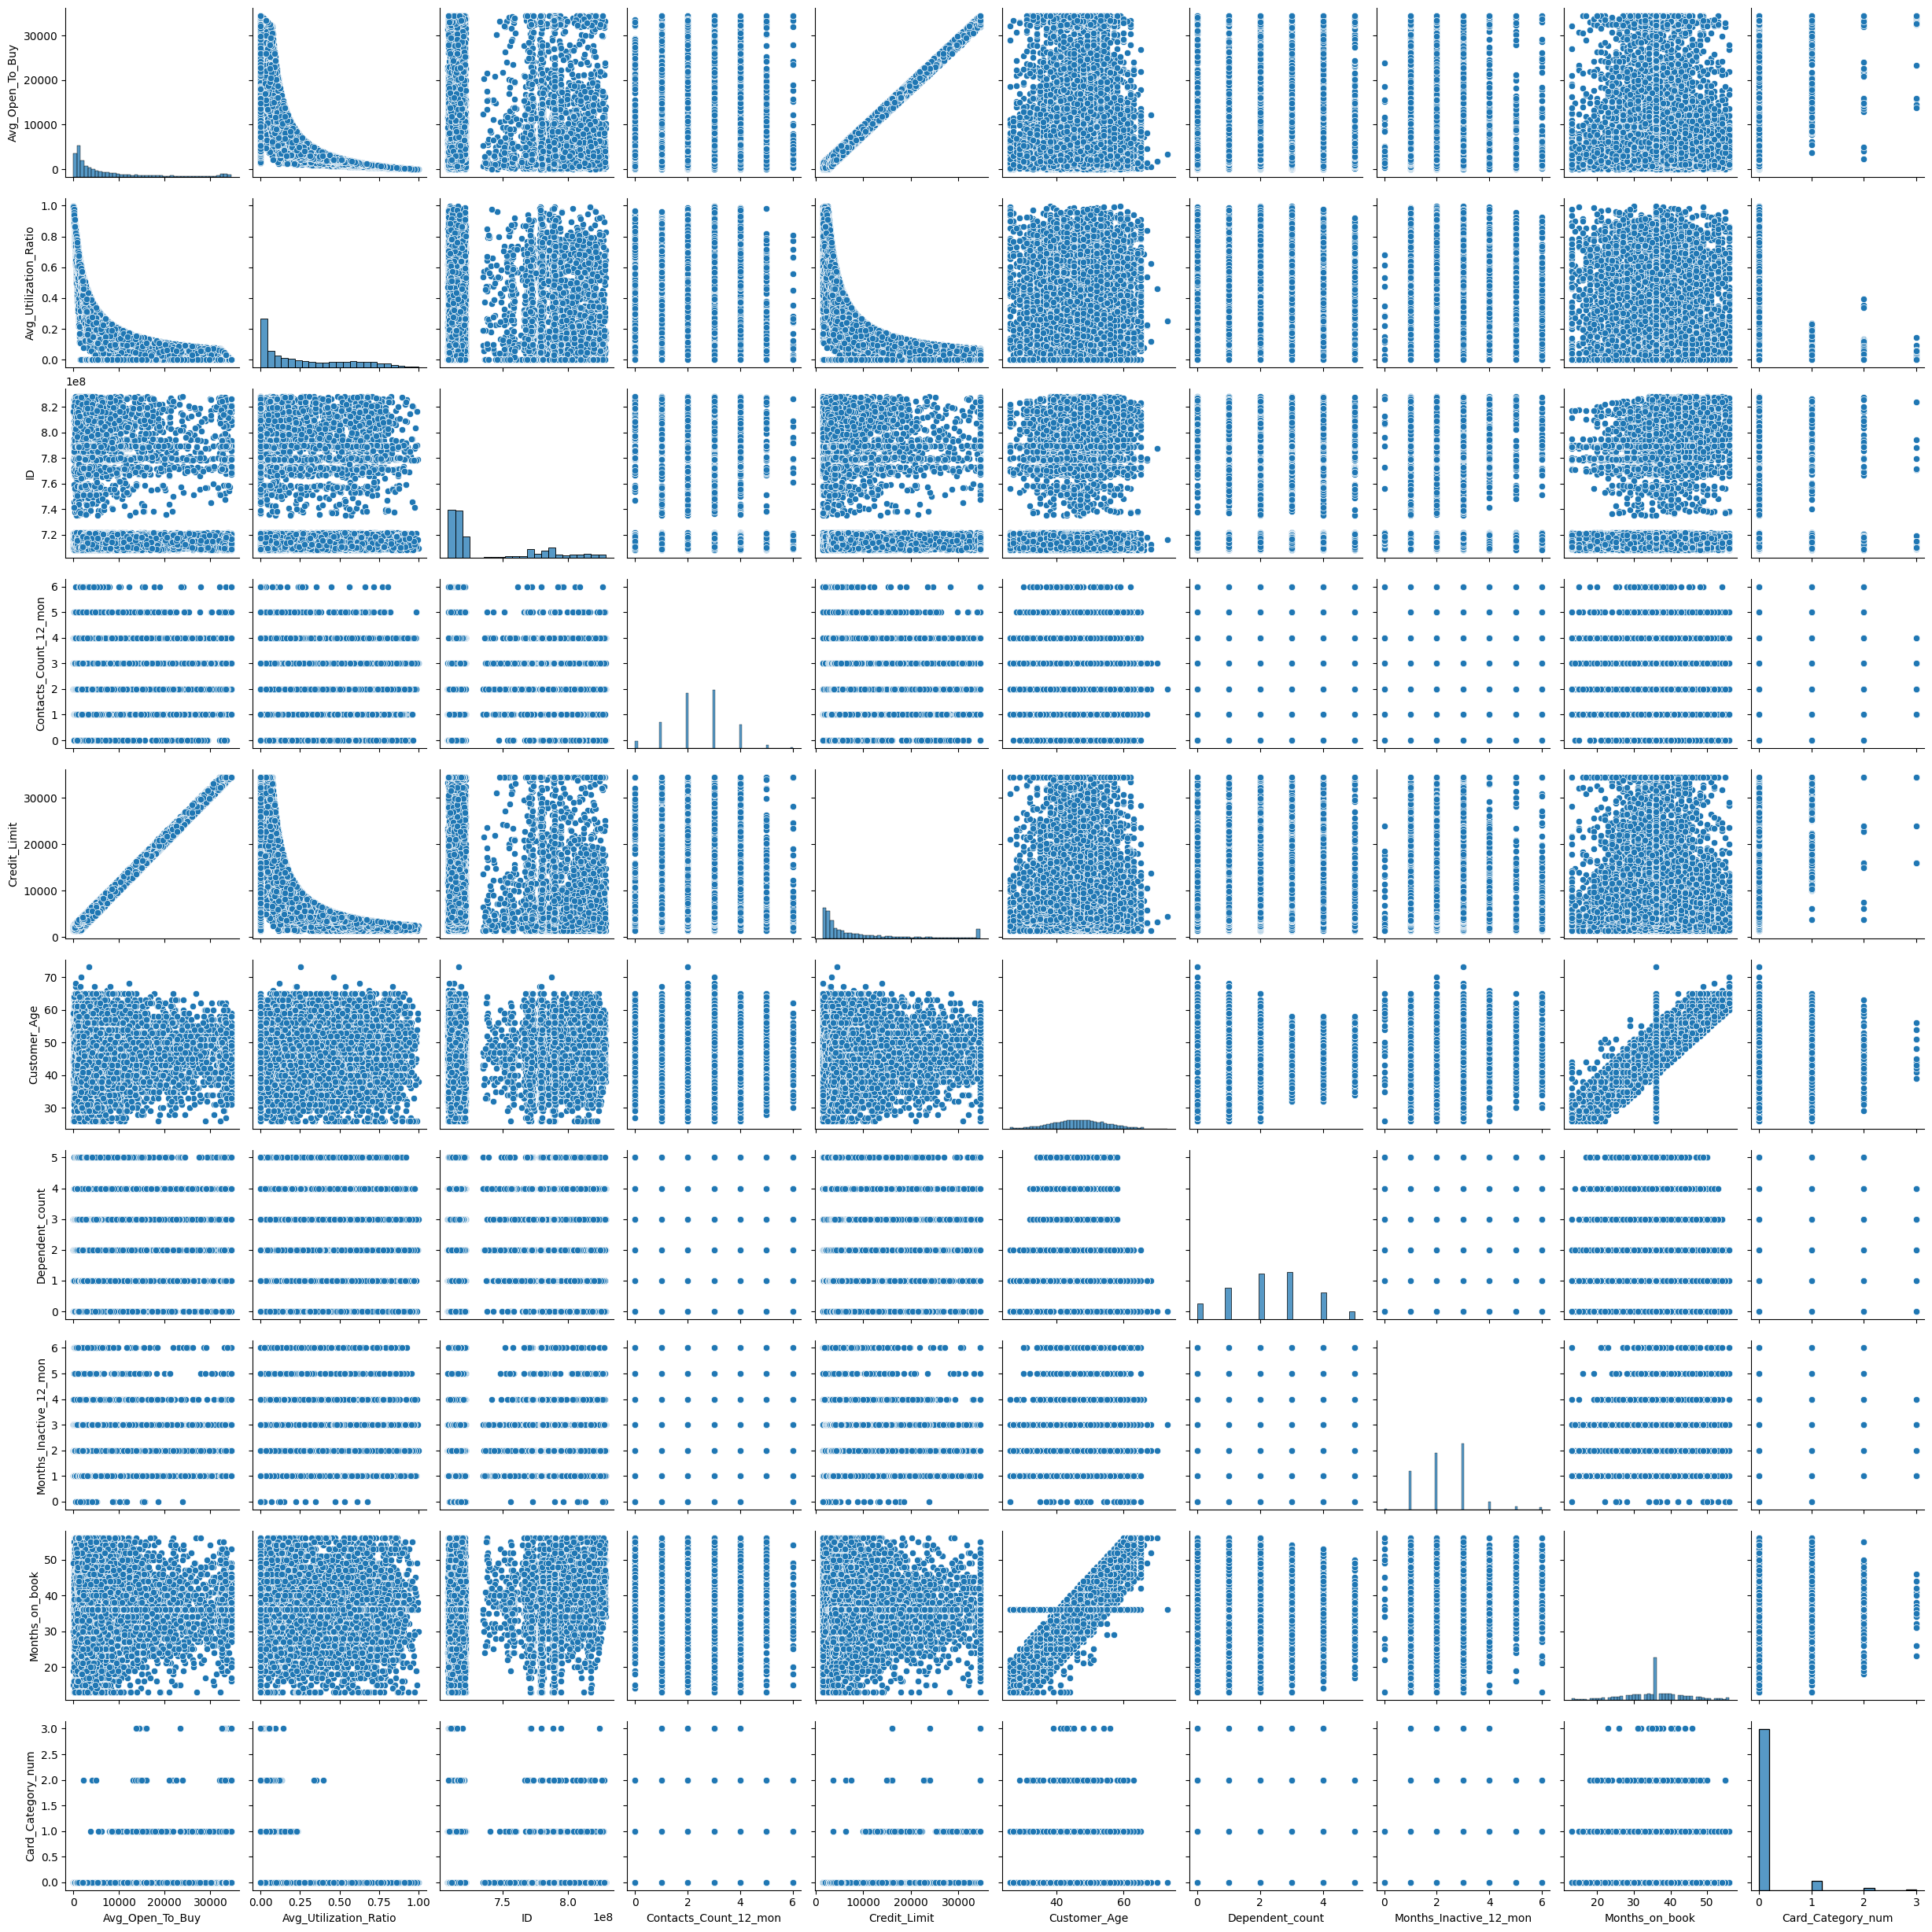

In [75]:
##################################################################################################
###### ATENÇÃO = COMPILAR COM NÚMERO PEQUENO DE VARIÁVEIS! SUGIRO 4, POIS LEVA ALGUNS MINUTOS
##################################################################################################

# Gera distribuição de todas as variáveis, comando demorado para muitas colunas
sns.pairplot(df_menor)

<Axes: xlabel='Card_Category', ylabel='count'>

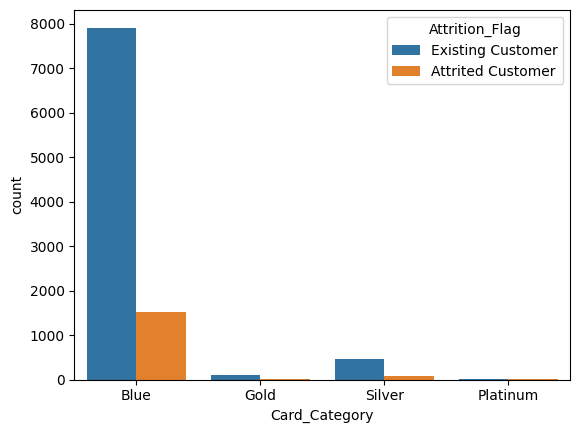

In [76]:
# Grafico de barras com divisão por uma variável categorica
sns.countplot(x='Card_Category', hue='Attrition_Flag', data=df_menor)

<Axes: xlabel='Card_Category', ylabel='Credit_Limit'>

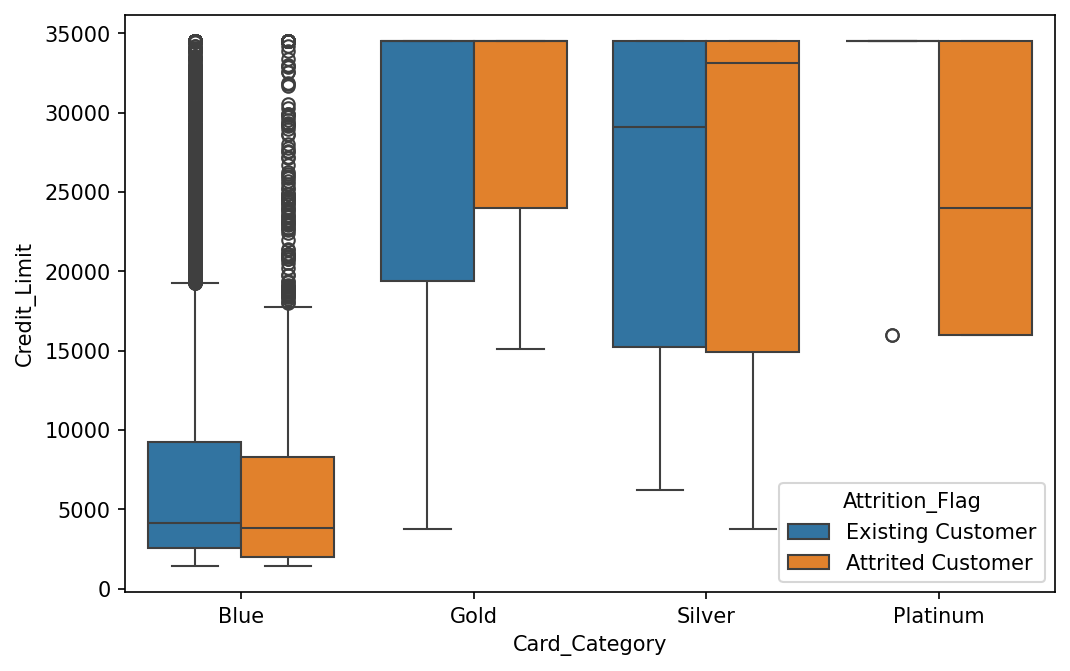

In [77]:
# Boxplot (quartis) da variável Card_Category e Credit_Limit com segmentação pela variável Attrition_Flag.
plt.figure(figsize=(8,5), dpi=150)
sns.boxplot(x='Card_Category', y='Credit_Limit', hue='Attrition_Flag', data=df_menor)

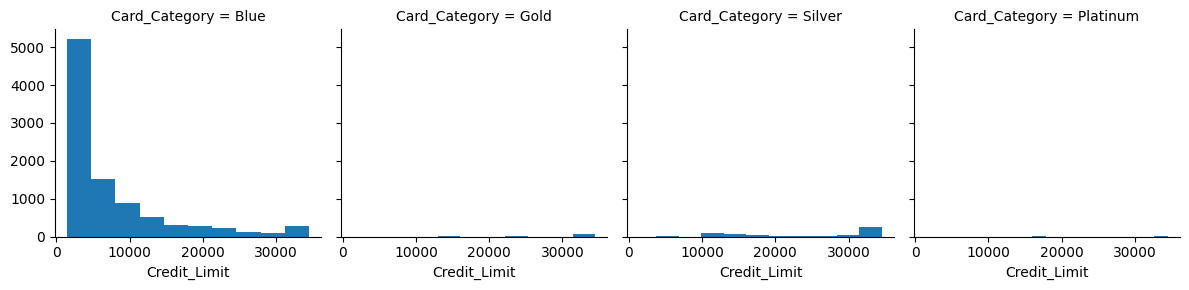

In [78]:
# Histogramas
# Cria um objeto que terá as classes da variável passada, neste caso 5 classes (Card_Category)
g = sns.FacetGrid(df_menor, col='Card_Category')

# Gera um histograma Credit_Limit
g.map(plt.hist,'Credit_Limit', bins=10)

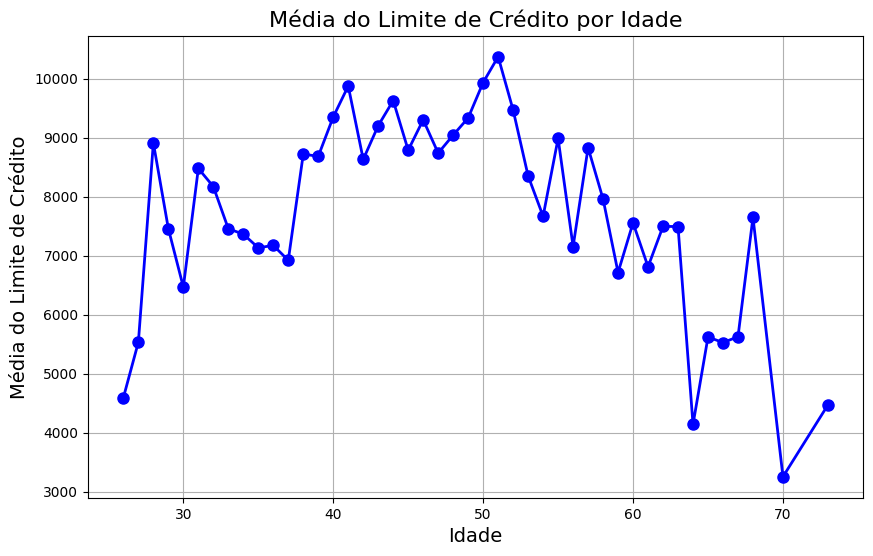

In [79]:
# Gráfico de linhas
# Calcula a média do limite de crédito para cada idade
media_limite_credito_por_idade = df.groupby('Customer_Age')['Credit_Limit'].mean().reset_index()

# Cria o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(media_limite_credito_por_idade['Customer_Age'], media_limite_credito_por_idade['Credit_Limit'],
         marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)
plt.title('Média do Limite de Crédito por Idade', fontsize=16)
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Média do Limite de Crédito', fontsize=14)
plt.grid(True)  # Adiciona grades ao gráfico
plt.show()

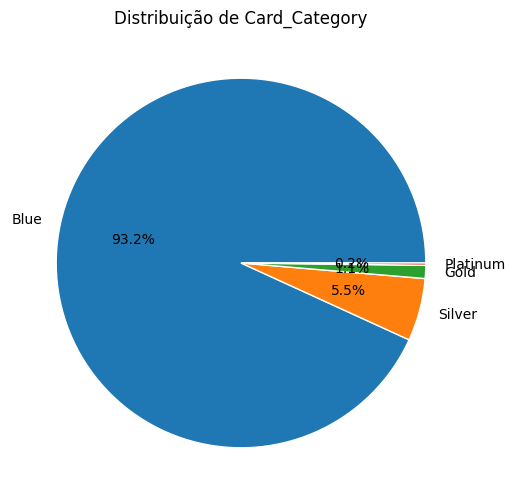

In [80]:
# Gráfico de pizza ou de setores
# Calcula a contagem de ocorrências de cada categoria
contagem_categorias = df['Card_Category'].value_counts()

# Cria o gráfico de setores
plt.figure(figsize=(8, 6))
contagem_categorias.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab10.colors, wedgeprops=dict(edgecolor='w'))
plt.title('Distribuição de Card_Category')
plt.ylabel('')  # Remove o rótulo do eixo y
plt.show()

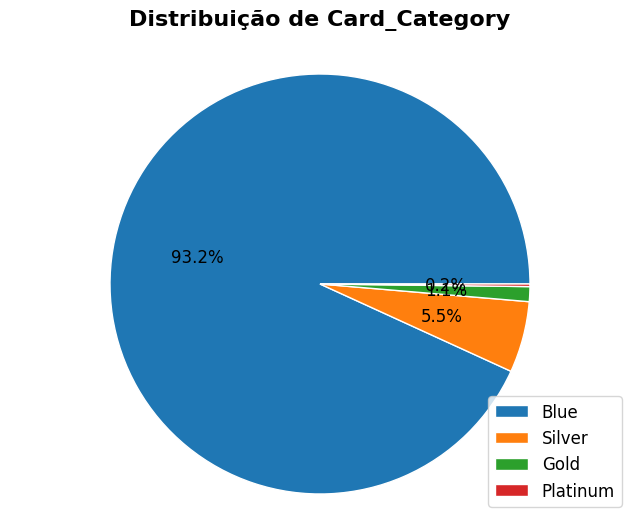

In [81]:
# Gráfico de pizza ou de setores - mais opções
# Calcula a contagem de ocorrências de cada categoria
contagem_categorias = df['Card_Category'].value_counts()

# Cores para cada categoria
cores = plt.cm.tab10.colors

# Cria o gráfico de setores
plt.figure(figsize=(8, 6))
_, _, texto = plt.pie(contagem_categorias, autopct='%1.1f%%', colors=cores, wedgeprops=dict(edgecolor='w'))

# Formatação do texto dentro do gráfico de setores
for t in texto:
    t.set_fontsize(12)
    t.set_color('black')

plt.title('Distribuição de Card_Category', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')  # Faz com que o gráfico seja desenhado como um círculo
plt.legend(contagem_categorias.index, loc='best', fontsize=12)
plt.show()

# Correlação

In [87]:

correlation = df_menor.select_dtypes(include=['number']).corr()


<Axes: >

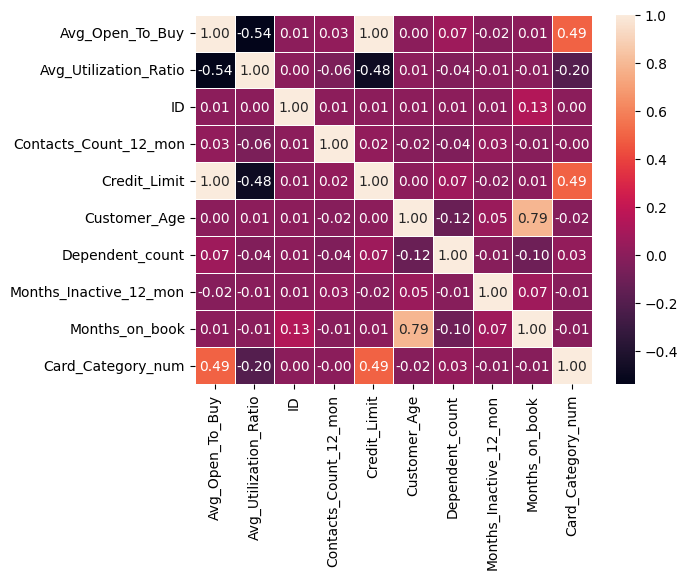

In [86]:
# plot da matriz de correlação

# análise de correlação


plot = sns.heatmap(correlation, annot = True, fmt=".2f", linewidths=.6)
plot

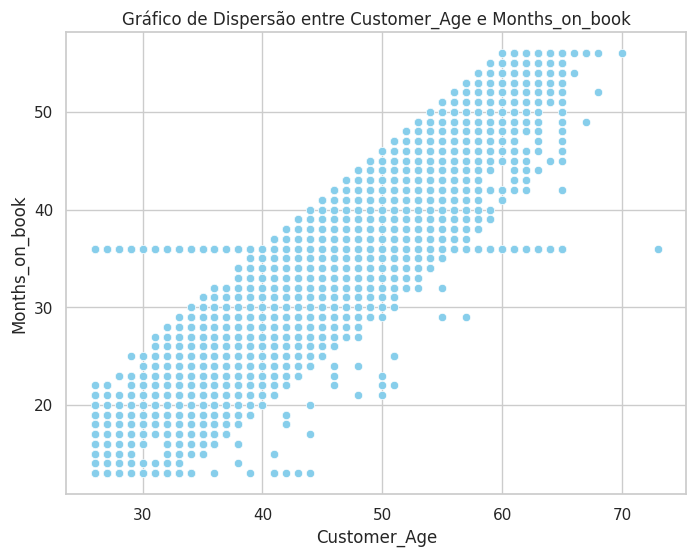

In [88]:
# Define o estilo estético do Seaborn
sns.set(style="whitegrid")

# Cria o gráfico de dispersão usando o Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Customer_Age', y='Months_on_book', data=df_menor, color='skyblue')
plt.title('Gráfico de Dispersão entre Customer_Age e Months_on_book')
plt.xlabel('Customer_Age')
plt.ylabel('Months_on_book')
plt.show()